## PREDICTING PROJECTS LESS-LIKELY TO BE FUNDED IN 2011

In [1]:
import pandas as pd

df = pd.read_csv("finalml_file.csv")

In [2]:
#Checking the number of rows and features
df.shape

(524949, 35)

In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
projectid,ffffac55ee02a49d1abc87ba6fc61135,ffff97ed93720407d70a2787475932b0,ffff418bb42fad24347527ad96100f81,ffff2d9c769c8fb5335e949c615425eb,fffeebf4827d745aa36b17c2d38d1966
donor_city,Peachtree City,NaN,NaN,NaN,NaN
donor_state,GA,NY,TX,ID,CA
donation_to_project,42.5,212.5,20.5,58.65,797.3
donation_optional_support,7.5,37.5,4.5,10.35,140.7
donation_total,50.0,250.0,25.0,69.0,938.0
donation_message,I gave to this project because I support the e...,I gave to this project because I am helping MC...,I gave to this project because this school is ...,Education is the most important thing in the w...,Chevron is committed to securing America's fut...
teacher_acctid,947066d0af47e0566f334566553dd6a6,462270f5d5c212162fcab11afa2623cb,e885fb002a1d0d39aaed9d21a7683549,485784e52a4c85ea6783285d09d8aea4,96c1a33b4f2b832595c3c6a01bc24c05
title,Recording Rockin' Readers,Kindergarten In Need of Important Materials!,Whistle While We Work!,Too Close for Comfort,Toot Your Flute!


## KEY OBSERVATIONS

In [4]:
#checking for the unique number of features in selected features.
print('Unique project ids:', df['projectid'].nunique())
print('Unique item_number ids:', df['item_number'].nunique())
print('Unique teacher_acctid ids:', df['teacher_acctid'].nunique())
print('Unique vendorid ids:', df['vendorid'].nunique())
print('Unique dates:', df['date_posted'].nunique())
print('Unique school ids:', df['schoolid'].nunique())


Unique project ids: 524949
Unique item_number ids: 178340
Unique teacher_acctid ids: 208169
Unique vendorid ids: 327
Unique dates: 3874
Unique school ids: 51996


In [5]:
#Checking for the data types
df.dtypes

Unnamed: 0                             int64
projectid                             object
donor_city                            object
donor_state                           object
donation_to_project                  float64
donation_optional_support            float64
donation_total                       float64
donation_message                      object
teacher_acctid                        object
title                                 object
short_description                     object
need_statement                        object
essay                                 object
is_exciting                           object
at_least_1_teacher_referred_donor     object
fully_funded                          object
at_least_1_green_donation             object
great_chat                            object
school_city                           object
school_state                          object
school_zip                           float64
schoolid                              object
school_cha

In [6]:
#Features to be used.
df.columns

Index(['Unnamed: 0', 'projectid', 'donor_city', 'donor_state',
       'donation_to_project', 'donation_optional_support', 'donation_total',
       'donation_message', 'teacher_acctid', 'title', 'short_description',
       'need_statement', 'essay', 'is_exciting',
       'at_least_1_teacher_referred_donor', 'fully_funded',
       'at_least_1_green_donation', 'great_chat', 'school_city',
       'school_state', 'school_zip', 'schoolid', 'school_charter',
       'teacher_teach_for_america', 'primary_focus_subject', 'resource_type',
       'poverty_level', 'grade_level', 'students_reached', 'date_posted',
       'vendorid', 'project_resource_type', 'item_number', 'item_unit_price',
       'item_quantity'],
      dtype='object')

In [7]:
#Checking for the null values in the features
df.isna().sum()

Unnamed: 0                                0
projectid                                 0
donor_city                           270816
donor_state                           90853
donation_to_project                       0
donation_optional_support                 0
donation_total                            0
donation_message                     156920
teacher_acctid                            0
title                                    17
short_description                        67
need_statement                          752
essay                                     2
is_exciting                               0
at_least_1_teacher_referred_donor       357
fully_funded                              0
at_least_1_green_donation               357
great_chat                                0
school_city                               0
school_state                              0
school_zip                                4
schoolid                                  0
school_charter                  

In [8]:
df = df.drop(['donation_message','project_resource_type','projectid'], axis = 1)

In [9]:
df = df.drop('Unnamed: 0', axis =1 )

In [10]:
#school_zip, vendorid
df['school_zip'] = df['school_zip'].astype('str')
df['vendorid'] = df['vendorid'].astype('str')

In [11]:
df[["donor_city","donor_state","need_statement","title","short_description","essay"]] = df[["donor_city","donor_state","need_statement","title","short_description","essay"]].fillna("Not available")

In [12]:
#at_least_1_teacher_referred_donor,at_least_1_green_donation,school_zip,primary_focus_subject,resource_type,poverty_level,grade_level, item_number 
df[["at_least_1_teacher_referred_donor","at_least_1_green_donation","school_zip","primary_focus_subject","resource_type","poverty_level","grade_level","item_number"]] =df[["at_least_1_teacher_referred_donor","at_least_1_green_donation","school_zip","primary_focus_subject","resource_type","poverty_level","grade_level","item_number"]].fillna("Unknown")


In [13]:
#Numeric ones: students_reached,item_unit_price, item_quantity
df[["students_reached","item_unit_price","item_quantity"]].describe()

,students_reached,item_unit_price,item_quantity
count,524834.000000,518659.000000,519387.000000
mean,94.376685,140.560319,7.938653
std,1666.877473,307.411905,1378.186089
min,0.000000,-39.600000,0.000000
25%,22.000000,11.950000,1.000000
50%,30.000000,37.410000,1.000000
75%,99.000000,179.000000,3.000000
max,999999.000000,93425.780000,993108.000000


In [14]:
#Observation: since the mean values varry significantly from the median, there are outliers affecting the mean"
#Replacing values with the median, which is less susceptible to outlier effect
import numpy as np
df[["students_reached","item_unit_price","item_quantity"]] = df[["students_reached","item_unit_price","item_quantity"]].fillna({
    "students_reached": df["students_reached"].median(),
    "item_unit_price": df["item_unit_price"].median(),
    "item_quantity": df["item_quantity"].median()})


In [15]:
df.isna().sum()

donor_city                           0
donor_state                          0
donation_to_project                  0
donation_optional_support            0
donation_total                       0
teacher_acctid                       0
title                                0
short_description                    0
need_statement                       0
essay                                0
is_exciting                          0
at_least_1_teacher_referred_donor    0
fully_funded                         0
at_least_1_green_donation            0
great_chat                           0
school_city                          0
school_state                         0
school_zip                           0
schoolid                             0
school_charter                       0
teacher_teach_for_america            0
primary_focus_subject                0
resource_type                        0
poverty_level                        0
grade_level                          0
students_reached         

In [17]:
df.dtypes

donor_city                            object
donor_state                           object
donation_to_project                  float64
donation_optional_support            float64
donation_total                       float64
teacher_acctid                        object
title                                 object
short_description                     object
need_statement                        object
essay                                 object
is_exciting                           object
at_least_1_teacher_referred_donor     object
fully_funded                          object
at_least_1_green_donation             object
great_chat                            object
school_city                           object
school_state                          object
school_zip                            object
schoolid                              object
school_charter                        object
teacher_teach_for_america             object
primary_focus_subject                 object
resource_t

In [18]:
#Converting date columns as string to datetime object
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [19]:
#Selecting data from 2003 to 2010
df_2003_2010 = df[~df['date_posted'].dt.year.isin([2011,2012,2013])]

In [20]:
df_2003_2010['date_posted'].unique()

<DatetimeArray>
['2010-09-11 00:00:00', '2009-04-03 00:00:00', '2010-11-15 00:00:00',
 '2006-11-22 00:00:00', '2009-05-12 00:00:00', '2010-12-12 00:00:00',
 '2007-12-02 00:00:00', '2010-07-06 00:00:00', '2007-09-16 00:00:00',
 '2008-11-07 00:00:00',
 ...
 '2003-01-12 00:00:00', '2002-12-17 00:00:00', '2007-06-27 00:00:00',
 '2005-04-16 00:00:00', '2005-12-24 00:00:00', '2004-08-07 00:00:00',
 '2006-03-04 00:00:00', '2002-11-06 00:00:00', '2003-07-01 00:00:00',
 '2003-04-30 00:00:00']
Length: 2778, dtype: datetime64[ns]

In [21]:
n = len(df_2003_2010)  # total number of rows
sample_size = 15000
step = n // sample_size  # calculate step size

# Systematic sampling
df1 = df_2003_2010.iloc[::step].head(sample_size)





In [22]:
df1.shape

(15000, 31)

## FEATURE ENGINEER(DATE_COLUMN)

In [23]:
df1['school_zip'] = df1['school_zip'].astype('str')
df1['vendorid'] = df1['vendorid'].astype('str')

In [24]:
df1['year'] = df1['date_posted'].dt.year

In [25]:
df1['month'] = df1['date_posted'].dt.month

In [26]:
df1 = df1.drop('date_posted', axis = 1)

In [27]:
#Converting our target variable (fully_funded) to numerical values
df1['fully_funded'] = df1['fully_funded'].replace({'t':1, 'f':0}).astype('int')


C:\Users\davef\AppData\Local\Temp\ipykernel_195976\3565808953.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['fully_funded'] = df1['fully_funded'].replace({'t':1, 'f':0}).astype('int')


In [28]:
df1['fully_funded'].unique()

array([1, 0])

In [29]:
df1.shape

(15000, 32)

In [30]:
for col in df1.columns:
    print(f'{col}: {df1[col].nunique()}')

donor_city: 2216
donor_state: 55
donation_to_project: 4988
donation_optional_support: 4451
donation_total: 5557
teacher_acctid: 12376
title: 14621
short_description: 14979
need_statement: 14737
essay: 14993
is_exciting: 2
at_least_1_teacher_referred_donor: 3
fully_funded: 2
at_least_1_green_donation: 3
great_chat: 2
school_city: 2465
school_state: 51
school_zip: 4441
schoolid: 8105
school_charter: 2
teacher_teach_for_america: 2
primary_focus_subject: 27
resource_type: 6
poverty_level: 4
grade_level: 4
students_reached: 359
vendorid: 121
item_number: 11723
item_unit_price: 3752
item_quantity: 95
year: 9
month: 12


In [31]:
#Feature selection was done based on domain knowledge.
#Features of high importance but low cardinality were selected to accommodate for computing limitations.
df1 = df1[['is_exciting','donor_state','school_state','at_least_1_teacher_referred_donor','vendorid','great_chat','school_charter',
        'teacher_teach_for_america','primary_focus_subject','resource_type','poverty_level','grade_level','month','year','fully_funded']]

In [32]:
df1.dtypes

is_exciting                          object
donor_state                          object
school_state                         object
at_least_1_teacher_referred_donor    object
vendorid                             object
great_chat                           object
school_charter                       object
teacher_teach_for_america            object
primary_focus_subject                object
resource_type                        object
poverty_level                        object
grade_level                          object
month                                 int32
year                                  int32
fully_funded                          int32
dtype: object

In [33]:
for col in df1.columns:
    print(f'{col}: {df1[col].nunique()}')

is_exciting: 2
donor_state: 55
school_state: 51
at_least_1_teacher_referred_donor: 3
vendorid: 121
great_chat: 2
school_charter: 2
teacher_teach_for_america: 2
primary_focus_subject: 27
resource_type: 6
poverty_level: 4
grade_level: 4
month: 12
year: 9
fully_funded: 2


In [34]:
X = df1.drop('fully_funded',axis = 1)
y = df1['fully_funded']

In [35]:
#Baseline model
y.value_counts(normalize = True)

fully_funded
1    0.836933
0    0.163067
Name: proportion, dtype: float64

In [36]:
X.dtypes


is_exciting                          object
donor_state                          object
school_state                         object
at_least_1_teacher_referred_donor    object
vendorid                             object
great_chat                           object
school_charter                       object
teacher_teach_for_america            object
primary_focus_subject                object
resource_type                        object
poverty_level                        object
grade_level                          object
month                                 int32
year                                  int32
dtype: object

In [37]:
X.shape

(15000, 14)

In [38]:
#Building a preprocessing pipeline
from sklearn.pipeline import  Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

ohe_cols = X.select_dtypes(['object']).columns
num_cols = X.select_dtypes(['float64','int64']).columns



preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
            ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output = False))
        ]), ohe_cols),
        
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols)
    ],
    remainder='passthrough'
)


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2025, stratify = y)

In [40]:
from sklearn.pipeline import  Pipeline
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

## Classification with SGDClassifier Using Logisitc Regression

In [41]:
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import cross_val_score, StratifiedKFold
pipe = ImbPipeline([
    ('preprocessor',preprocessor),
    ('smote',SMOTE(sampling_strategy = 'minority', random_state=2025)),
    ('clf', SGDClassifier())
])
# Parameter grid
model_params = {
    'clf__alpha': [0.001, 0.01, 0.1, 1],
    'clf__max_iter': [4000, 8000],
    'clf__loss': ['log_loss'],
    'clf__penalty': ['l2'],
    'clf__tol': [1e-3],
    'clf__random_state': [42]
}



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
# Grid search
model = GridSearchCV(pipe, model_params, cv=cv, scoring='f1')

In [42]:
model.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['is_exc...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index([], dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=2025,
                                              sampling_strategy='minority')),
                                       ('clf', SGDClassifier())]),
             param_grid={'clf__alpha': [0.001, 0.01, 0.1, 1],
                         'clf__loss': ['log_loss'],
                         'clf__max_iter': [4000, 8000], 'clf__penalty': ['l2'],
                         'clf__random_state': [42], 'clf__tol': [0.001]},
             scoring='f1')

In [43]:
print("Test Model F1 Score:", model.score(X_test, y_test))

print("Train Model F1 Score:", model.score(X_train, y_train))

Test Model F1 Score: 0.0
Train Model F1 Score: 0.0


In [44]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

y_predicted= model.predict(X_test)

cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[ 489    0]
 [2511    0]]


Text(0.5, 1.0, 'Classification Using SGDClassifier with Logistic Regression')

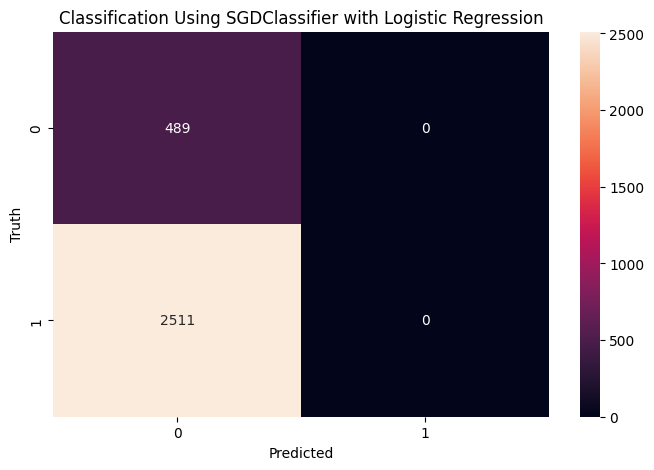

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Classification Using SGDClassifier with Logistic Regression')

## Classification Using RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier
pipe2 = ImbPipeline([
    ('preprocessor',preprocessor),
    ('smote',SMOTE(sampling_strategy = 'minority', random_state=2025)),
    ('clf', RandomForestClassifier())
])

# Parameter grid
model_params = {
    'clf__n_estimators': [10,20,30,40,50]
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
model = GridSearchCV(pipe2, model_params, cv=cv, scoring='f1')

In [47]:
model.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['is_exc...
       'resource_type', 'poverty_level', 'grade_level'],
      dtype='object')),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index([], dtype='object'))])),
                                       ('smote',
                                        SMOTE(random_state=2025,
                                              sampling_strategy='minority')),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__n_estimators': [10, 20, 30, 40, 50]},
             scoring='f1')

In [48]:
print("Test Model F1 Score:", model.score(X_test, y_test))

print("Train Model F1 Score:", model.score(X_train, y_train))

Test Model F1 Score: 0.9037423198659468
Train Model F1 Score: 0.9996018315747561


In [49]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

y_predicted= model.predict(X_test)

cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[  56  433]
 [  84 2427]]


Text(0.5, 1.0, 'Classification Using Random Forest')

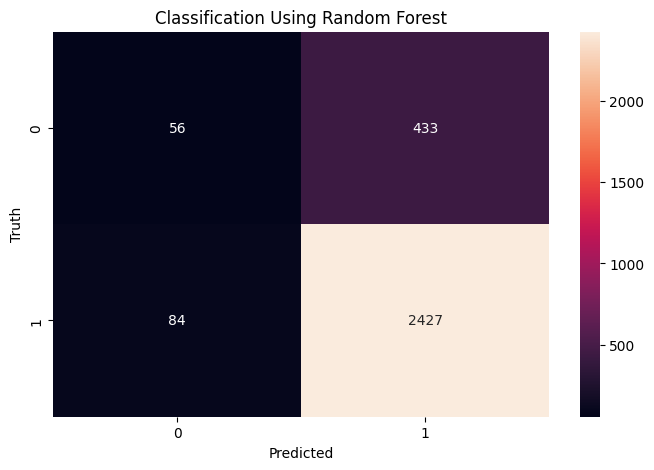

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Classification Using Random Forest')

## CLASSIFYING WITH GRADIENT BOOSTING

In [51]:
from xgboost import XGBClassifier

pipe3 = ImbPipeline([
    ('preprocessor',preprocessor),
    ('smote',SMOTE(sampling_strategy = 'minority', random_state=2025)),
    ('clf', XGBClassifier())
])

# Parameter grid
model_params = {
    'clf__n_estimators': [10,20,30,40,50]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2025)
model = GridSearchCV(pipe3, model_params, cv=cv, scoring='f1')

In [52]:
model.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['is_exc...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'clf__n_estimators': [10, 20, 30, 40, 50]},
             scoring='f1')

In [53]:
print("Test Model F1 Score:", model.score(X_test, y_test))

print("Train Model F1 Score:", model.score(X_train, y_train))

Test Model F1 Score: 0.906811377245509
Train Model F1 Score: 0.9206970459416643


In [54]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

y_predicted= model.predict(X_test)

cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[  79  410]
 [  88 2423]]


Text(0.5, 1.0, 'Classification Using XGBClassifier')

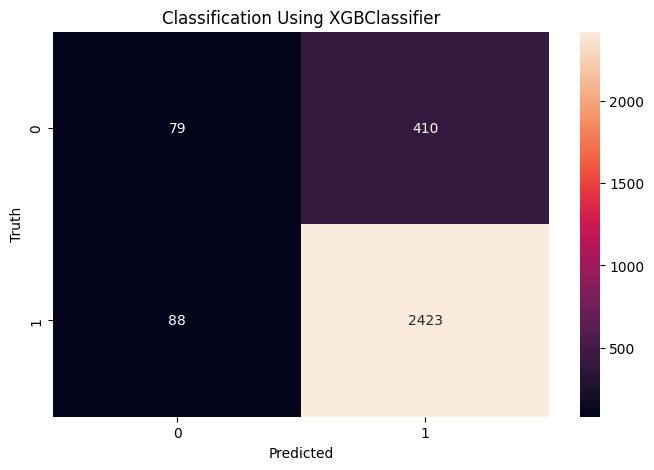

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Classification Using XGBClassifier')

In [56]:
#Exporting the model
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(model,f)

## FINDING PROJECTS LESS LIKELY TO BE FUNDED IN 2013

In [57]:
df_2011 = df[df['date_posted'].dt.year == 2011]

In [58]:
df_2011.shape

(90076, 31)

In [59]:
df2 = df_2011

In [60]:
df2['school_zip'] = df2['school_zip'].astype('str')
df2['vendorid'] = df2['vendorid'].astype('str')

df2['year'] = df2['date_posted'].dt.year
df2['month'] = df2['date_posted'].dt.month

df2 = df2.drop('date_posted', axis = 1)
df2['fully_funded'] = df2['fully_funded'].replace({'t':1, 'f':0}).astype('int')

#to add: 'donor_state','school_state','vendorid'
df2 = df2[['is_exciting','donor_state','school_state','at_least_1_teacher_referred_donor','vendorid','great_chat','school_charter',
        'teacher_teach_for_america','primary_focus_subject','resource_type','poverty_level','grade_level','month','year','fully_funded']]

X = df2.drop('fully_funded',axis = 1)
y = df2['fully_funded']

C:\Users\davef\AppData\Local\Temp\ipykernel_195976\1117451204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['school_zip'] = df2['school_zip'].astype('str')
C:\Users\davef\AppData\Local\Temp\ipykernel_195976\1117451204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vendorid'] = df2['vendorid'].astype('str')
C:\Users\davef\AppData\Local\Temp\ipykernel_195976\1117451204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [61]:
import pickle
with open('model_pickle','rb') as f:
    model = pickle.load(f)

In [62]:
prob_class_0 = model.predict_proba(X)[:,0]

In [63]:
y_pred = model.best_estimator_.predict(X)
print(confusion_matrix(y, y_pred))

[[ 3332 16010]
 [ 3229 67505]]


In [64]:
from sklearn.metrics import classification_report
y_pred = model.best_estimator_.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.17      0.26     19342
           1       0.81      0.95      0.88     70734

    accuracy                           0.79     90076
   macro avg       0.66      0.56      0.57     90076
weighted avg       0.74      0.79      0.74     90076



In [65]:
#find the bottom 10% of projects less_likely to be funded
prob_class_0[:10]

array([0.3871513 , 0.14699274, 0.01377916, 0.8375176 , 0.01396602,
       0.00679082, 0.6578355 , 0.3746636 , 0.24479431, 0.07005054],
      dtype=float32)

In [66]:
prob_class_0.shape

(90076,)

In [67]:
X_with_probs = X.copy()
X_with_probs['prob_class_0'] = prob_class_0

In [68]:
X_with_probs.shape

(90076, 15)

In [69]:
X_with_probs['fully_funded'] = y.values

In [70]:
less_likely_funded = X_with_probs[X_with_probs['fully_funded'] == 0]

In [71]:
bottom_10_percent = less_likely_funded.nsmallest(int(0.10*len(less_likely_funded)),'prob_class_0')

## Projects less likely to be funded (bottom 10%)

In [72]:
bottom_10_percent.head(10)

,is_exciting,donor_state,school_state,at_least_1_teacher_referred_donor,vendorid,great_chat,school_charter,teacher_teach_for_america,primary_focus_subject,resource_type,poverty_level,grade_level,month,year,prob_class_0,fully_funded
320696,f,WA,NY,f,752.0,f,f,f,Environmental Science,Supplies,highest poverty,Grades 9-12,12,2011,0.014451,0
185341,f,NY,NV,f,767.0,f,f,f,Mathematics,Supplies,highest poverty,Grades 3-5,12,2011,0.017428,0
250084,f,WA,NC,t,95.0,f,f,f,Environmental Science,Supplies,highest poverty,Grades 9-12,10,2011,0.020998,0
270110,f,NY,CA,t,7.0,f,f,f,Environmental Science,Books,highest poverty,Grades 3-5,12,2011,0.021653,0
300850,f,NY,NY,f,178.0,f,t,f,Mathematics,Supplies,highest poverty,Grades 6-8,12,2011,0.023667,0
371701,f,AK,NV,f,7.0,f,f,t,Literacy,Books,highest poverty,Grades 3-5,12,2011,0.023929,0
301289,f,WA,NY,f,7.0,f,f,f,History & Geography,Books,highest poverty,Grades 9-12,6,2011,0.024219,0
259622,f,AZ,AZ,f,45.0,f,f,t,Mathematics,Supplies,highest poverty,Grades 9-12,7,2011,0.025062,0
14805,f,NV,NV,f,7.0,f,f,t,Literature & Writing,Books,highest poverty,Grades 6-8,12,2011,0.025197,0
10826,f,NV,NV,f,758.0,f,f,f,Mathematics,Supplies,highest poverty,Grades 3-5,1,2011,0.027360,0


In [73]:
bottom_10_percent.shape

(1934, 16)

## ANALYSIS ON RESULTS(BOTTOM 10%)

In [74]:
bottom_10_percent.columns

Index(['is_exciting', 'donor_state', 'school_state',
       'at_least_1_teacher_referred_donor', 'vendorid', 'great_chat',
       'school_charter', 'teacher_teach_for_america', 'primary_focus_subject',
       'resource_type', 'poverty_level', 'grade_level', 'month', 'year',
       'prob_class_0', 'fully_funded'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

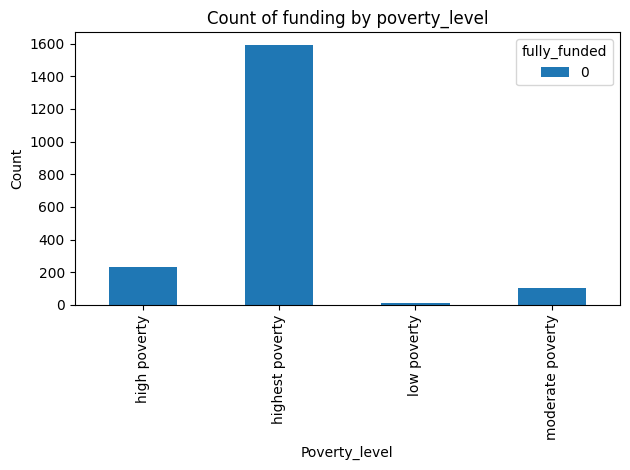

In [75]:
##Checking for the porportion of unfunded projects based on the poverty level
city_fund = pd.crosstab(bottom_10_percent['poverty_level'],bottom_10_percent['fully_funded'])

plt.figure(figsize=(10,5))
city_fund.plot(kind = 'bar')
plt.xlabel('Poverty_level')
plt.ylabel('Count')
plt.title('Count of funding by poverty_level')
plt.tight_layout()

<Figure size 1000x500 with 0 Axes>

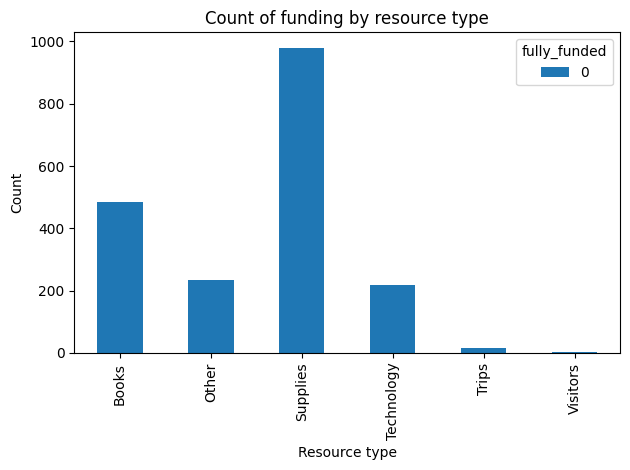

In [76]:
#Checking for the porportion of unfunded projects based on the types of resources requested
city_fund = pd.crosstab(bottom_10_percent['resource_type'],bottom_10_percent['fully_funded'])

plt.figure(figsize=(10,5))
city_fund.plot(kind = 'bar')
plt.xlabel('Resource type')
plt.ylabel('Count')
plt.title('Count of funding by resource type')
plt.tight_layout()

<Figure size 1400x500 with 0 Axes>

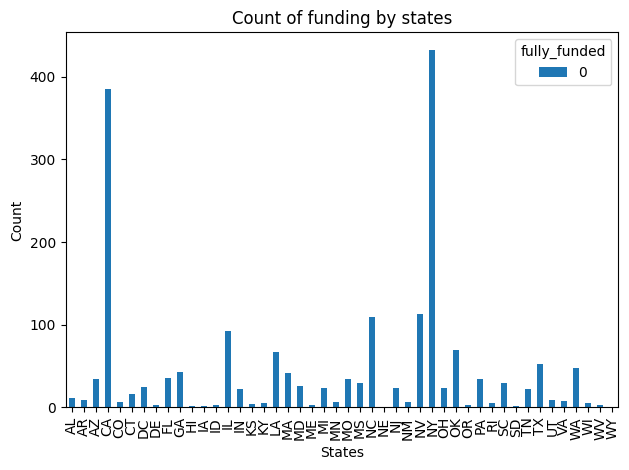

In [77]:
#Checking for the porportion of unfunded projects using school's states
city_fund = pd.crosstab(bottom_10_percent['school_state'],bottom_10_percent['fully_funded'])

plt.figure(figsize=(14,5))
city_fund.plot(kind = 'bar')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Count of funding by states')
plt.tight_layout()

<Figure size 1400x500 with 0 Axes>

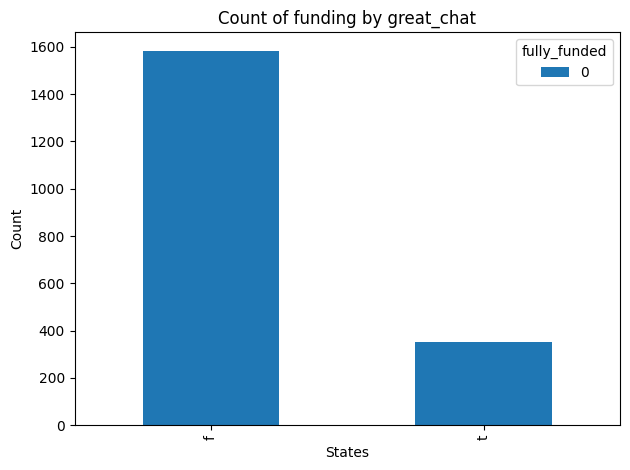

In [78]:
##Checking for the porportion of unfunded projects based on great or bad chats
city_fund = pd.crosstab(bottom_10_percent['great_chat'],bottom_10_percent['fully_funded'])

plt.figure(figsize=(14,5))
city_fund.plot(kind = 'bar')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Count of funding by great_chat')
plt.tight_layout()

<Figure size 1400x500 with 0 Axes>

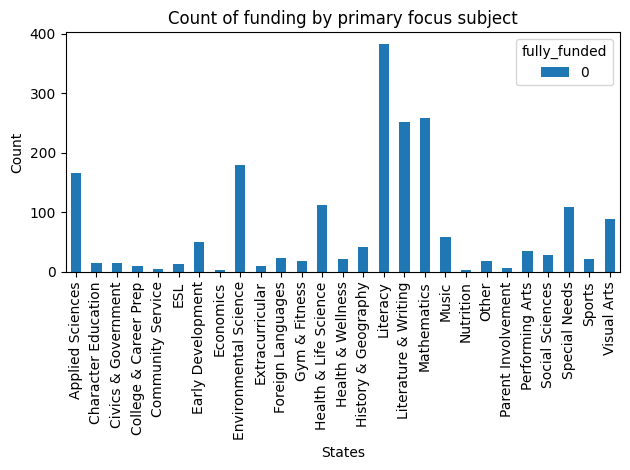

In [79]:
##Checking for the porportion of unfunded projects based on the primary_focus_subject
city_fund = pd.crosstab(bottom_10_percent['primary_focus_subject'],bottom_10_percent['fully_funded'])

plt.figure(figsize=(14,5))
city_fund.plot(kind = 'bar')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Count of funding by primary focus subject')
plt.tight_layout()

<Figure size 1400x500 with 0 Axes>

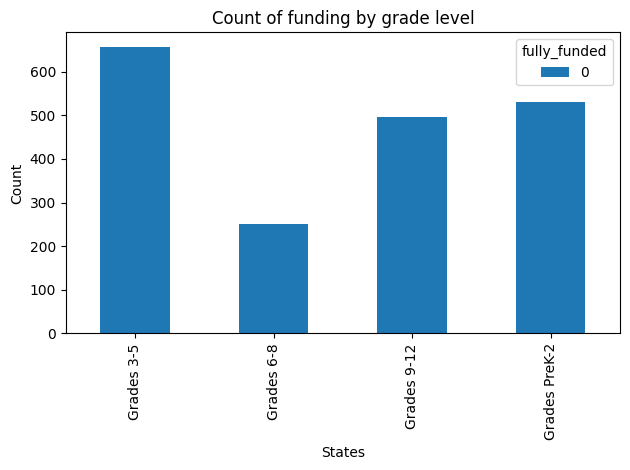

In [80]:
##Checking for the porportion of unfunded projects using grade level
city_fund = pd.crosstab(bottom_10_percent['grade_level'],bottom_10_percent['fully_funded'])

plt.figure(figsize=(14,5))
city_fund.plot(kind = 'bar')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Count of funding by grade level')
plt.tight_layout()

<Figure size 1400x500 with 0 Axes>

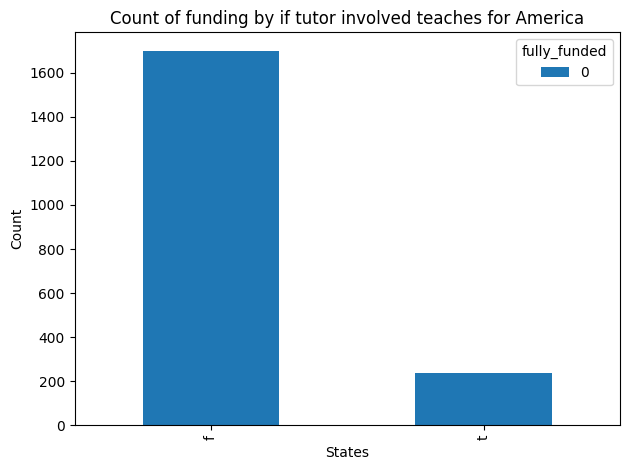

In [81]:
##Checking for the porportion of unfunded projects based on the status of the teacher(American or not)
city_fund = pd.crosstab(bottom_10_percent['teacher_teach_for_america'],bottom_10_percent['fully_funded'])

plt.figure(figsize=(14,5))
city_fund.plot(kind = 'bar')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Count of funding by if tutor involved teaches for America')
plt.tight_layout()